<a href="https://colab.research.google.com/github/Meave0108/my_work-python-/blob/master/python_HW0318_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 讀入資料__fashion


In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

## 數據集內容


#### Labels

* T-shirt/top -->0
* Trouser -->1
* Pullover -->2
* Dress -->3
* Coat -->4
* Sandal -->5
* Shirt -->6
* Sneaker -->7
* Bag -->8
* Ankle boot -->9






In [56]:
len(x_train)

60000

In [57]:
len(x_test)

10000

正確答案 7


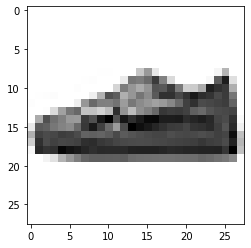

In [58]:
n=108
plt.imshow(x_train[n],cmap='Greys')
print('正確答案',y_train[n])

## 資料整理


In [0]:
x_train=x_train*100/255
x_test=x_test*100/255

In [60]:
x_train.shape

(60000, 28, 28)

In [61]:
x_train=x_train.reshape(60000,28*28)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_test=x_test.reshape(10000,28*28)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train[108]
y_train=to_categorical(y_train,10)

In [0]:
y_test=to_categorical(y_test,10)

In [66]:
y_train[108]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model=Sequential()  #開空的函數學習機

In [0]:
model.add(Dense(90,input_dim=784,activation='relu'))

In [0]:
model.add(Dense(90,activation='relu'))

In [0]:
model.add(Dense(67,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

## 組裝神經網路

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 90)                70650     
_________________________________________________________________
dense_7 (Dense)              (None, 90)                8190      
_________________________________________________________________
dense_8 (Dense)              (None, 67)                6097      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                680       
Total params: 85,617
Trainable params: 85,617
Non-trainable params: 0
_________________________________________________________________


## 訓練神經網路

In [75]:
model.fit(x_train,y_train,batch_size=80,epochs=100)

Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0856 - accuracy: 0.2718
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0597 - accuracy: 0.5527
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0443 - accuracy: 0.6758
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0381 - accuracy: 0.7309
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0348 - accuracy: 0.7533
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0327 - accuracy: 0.7679
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0312 - accuracy: 0.7790
Epoch 8/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0302 - accuracy: 0.7856
Epoch 9/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0294 - accuracy: 0.7914
Epoch 10/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0287 - accura

## 訓練結果

In [0]:
a=model.predict_classes(x_test)


神經網路預測是: 8


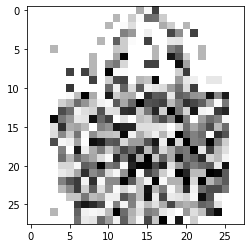

In [107]:
def show_predict(n):
  print('神經網路預測是:',a[n])
  plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

show_predict(2000)

### 檢查是否有overfitting的狀況

In [103]:
loss,accuracy = model.evaluate(x_test, y_test)
print('\nresult')
print(f'loss：{loss}\nacccuracy: {accuracy}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.8171

result
loss：0.027197737246751785
acccuracy: 0.8170999884605408


### 利用混淆矩陣看預測準確度

In [108]:
from sklearn.metrics import confusion_matrix
b=model.predict(x_test)
y_test_classes = np.argmax(y_test,axis=1)
y_pred_classes = np.argmax(b,axis=1)
print (confusion_matrix(y_test_classes,y_pred_classes))

[[762  11  24  52   3   0 127   0  21   0]
 [  7 933   5  44   5   0   4   0   2   0]
 [ 14   3 702  14 171   0  87   0   9   0]
 [ 28  25  13 843  52   0  32   0   6   1]
 [  3   4 141  41 703   0  99   0   9   0]
 [  0   0   0   1   0 930   0  38   2  29]
 [140   6 112  37 147   0 531   0  26   1]
 [  0   0   0   0   0  41   0 914   0  45]
 [  3   1  12   5   9   7  23   6 933   1]
 [  0   0   0   1   0  21   0  57   1 920]]
